# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [7]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
#建立模型
model = Sequential()

W0709 23:26:53.440738 13656 deprecation_wrapper.py:119] From C:\Users\pingh\Anaconda3_2019\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [9]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

W0709 23:27:06.505074 13656 deprecation_wrapper.py:119] From C:\Users\pingh\Anaconda3_2019\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 23:27:06.514049 13656 deprecation_wrapper.py:119] From C:\Users\pingh\Anaconda3_2019\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



In [10]:
#建構輸入層
model.add(Dense(units=128, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [11]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [12]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [13]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

W0709 23:28:05.728473 13656 deprecation_wrapper.py:119] From C:\Users\pingh\Anaconda3_2019\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0709 23:28:05.763378 13656 deprecation_wrapper.py:119] From C:\Users\pingh\Anaconda3_2019\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [14]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

W0709 23:28:14.145132 13656 deprecation.py:323] From C:\Users\pingh\Anaconda3_2019\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0709 23:28:14.210967 13656 deprecation_wrapper.py:119] From C:\Users\pingh\Anaconda3_2019\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 137us/step - loss: 0.2581 - acc: 0.9240 - val_loss: 0.1141 - val_acc: 0.9659
Epoch 2/10
48000/48000 [==============================] - 6s 129us/step - loss: 0.0971 - acc: 0.9699 - val_loss: 0.0929 - val_acc: 0.9724
Epoch 3/10
48000/48000 [==============================] - 6s 129us/step - loss: 0.0656 - acc: 0.9791 - val_loss: 0.0903 - val_acc: 0.9722
Epoch 4/10
48000/48000 [==============================] - 6s 129us/step - loss: 0.0474 - acc: 0.9846 - val_loss: 0.0790 - val_acc: 0.9769
Epoch 5/10
48000/48000 [==============================] - 6s 133us/step - loss: 0.0354 - acc: 0.9887 - val_loss: 0.0923 - val_acc: 0.9748
Epoch 6/10
48000/48000 [==============================] - 6s 134us/step - loss: 0.0299 - acc: 0.9898 - val_loss: 0.0874 - val_acc: 0.9777
Epoch 7/10
48000/48000 [==============================] - 6s 133us/step - loss: 0.0231 - acc: 0.9926 - val_loss: 0.1382 - 

# 以圖形顯示訓練過程

In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

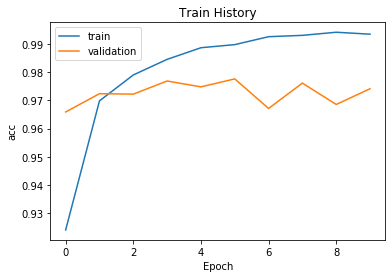

In [16]:
show_train_history(train_history,'acc','val_acc')

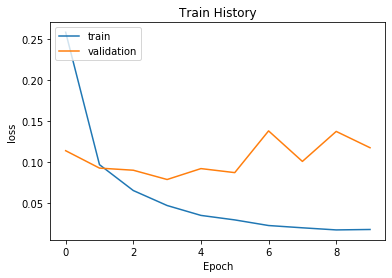

In [17]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [18]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 28us/step

accuracy= 0.977
